In [ ]:
import numpy as np 
import pandas as pd 
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import statistics
import json
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
import networkx as nx
#import igraph as ig
import statistics
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
sns.set_style('whitegrid')

# import functions as f

In [ ]:
colnames = ["userId", "productId", "Rating", "timestamp"]
ratings = pd.read_csv("/content/drive/MyDrive/course/Năm_4/Học Kỳ 7/DS300.M1_Hkhuynngh/Project/ratings_Musical_Instruments.csv", names= colnames)

In [ ]:
ratings

,userId,productId,Rating,timestamp
0,A1YS9MDZP93857,0006428320,3.0,1394496000
1,A3TS466QBAWB9D,0014072149,5.0,1370476800
2,A3BUDYITWUSIS7,0041291905,5.0,1381708800
3,A19K10Z0D2NTZK,0041913574,5.0,1285200000
4,A14X336IB4JD89,0201891859,1.0,1350432000
...,...,...,...,...
500171,A2XEVARMJP81E,B00LIR7QNS,5.0,1405641600
500172,A3PAQGM6P87MXO,B00LJD5AUM,5.0,1404518400
500173,A2KZX7A4XZ4T2W,B00LK7A9SK,5.0,1404518400
500174,AIDHT6KXOL64T,SMLRBIMX03,5.0,1355788800


#Check values

In [ ]:
n_users = ratings.userId.unique().shape[0]
n_items = ratings.productId.unique().shape[0]

print('No. of unique users: ', n_users)
print('No, of unique products: ', n_items)

No. of unique users:  339231
No, of unique products:  83046


In [ ]:
#Checking for missing values
print('Number of missing values across columns: \n',ratings.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


<BarContainer object of 20 artists>

Text(0, 0.5, 'Num of ratings')

Text(0.5, 1.0, 'Most popular')

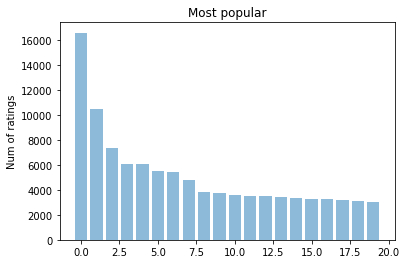

In [ ]:
# Most popular products
popular = ratings[['productId','Rating']].groupby('productId').sum().reset_index()
popular_20 = popular.sort_values('Rating', ascending=False).head(n=20)

objects = (list(popular_20['productId']))
y_pos = np.arange(len(objects))
performance = list(popular_20['Rating'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Num of ratings')
plt.title('Most popular')
 
plt.show()

#Distribution of ratings per user

In [ ]:
ratings_per_user = ratings.groupby('userId')['Rating'].count()
ratings_per_user = pd.DataFrame(ratings_per_user)
ratings_per_user.sort_values(by=ratings_per_user.columns[0], inplace = True)
ratings_per_user.rename(columns = {'Rating': 'No. of products rated'}, inplace = True)
print(ratings_per_user)
ratings_per_user.rename(columns = {'Num. of products rated':'Rating'}, inplace = True)

print('\nAvg no of ratings per user: ', statistics.mean(ratings_per_user[ratings_per_user.columns[0]].tolist()))

                       No. of products rated
userId                                      
A0002382258OFJJ2UYNTR                      1
A3DTXPIA1LW4LI                             1
A3DTWRE957F5ZK                             1
A3DTWDOB8PFXCN                             1
A3DTVMQGMNLX26                             1
...                                      ...
A2PR6NXG0PA3KY                           135
A33GGROUQRQZS                            154
A2NYK9KWFMJV4Y                           454
A2AIMXT9PLAM12                           463
A2PAD826IH1HFE                           483

[339231 rows x 1 columns]

Avg no of ratings per user:  1.4744407203351109


In [ ]:
ratings_per_user

,No. of products rated
userId,
A0002382258OFJJ2UYNTR,1
A3DTXPIA1LW4LI,1
A3DTWRE957F5ZK,1
A3DTWDOB8PFXCN,1
A3DTVMQGMNLX26,1
...,...
A2PR6NXG0PA3KY,135
A33GGROUQRQZS,154
A2NYK9KWFMJV4Y,454


In [ ]:
no_of_rated_movies_per_user = ratings.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rated_movies_per_user

userId
A2PAD826IH1HFE           483
A2AIMXT9PLAM12           463
A2NYK9KWFMJV4Y           454
A33GGROUQRQZS            154
A2PR6NXG0PA3KY           135
                        ... 
A3DTVMQGMNLX26             1
A3DTWDOB8PFXCN             1
A3DTWRE957F5ZK             1
A3DTXPIA1LW4LI             1
A0002382258OFJJ2UYNTR      1
Name: Rating, Length: 339231, dtype: int64

Text(0.5, 0, 'No of ratings by user')

Text(0.5, 1.0, 'PDF')

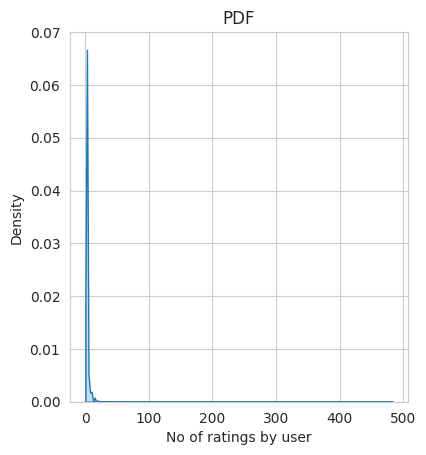

In [ ]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

#Distribution of ratings per product

In [ ]:
# Number of ratings per product
ratings_per_product = ratings.groupby('productId')['Rating'].count()
ratings_per_product = ratings_per_product.to_frame()
ratings_per_product.sort_values(by=ratings_per_product.columns[0], inplace = True)
ratings_per_product.rename(columns = {'Rating': 'No. of ratings recieved'}, inplace = True)
print(ratings_per_product)
ratings_per_product.rename(columns = {'No. of ratings recieved':'Rating'}, inplace = True)

print('\nAvg no of ratings per product: ', statistics.mean(ratings_per_product[ratings_per_product.columns[0]].tolist()))

            No. of ratings recieved
productId                          
0006428320                        1
B0054EUE9E                        1
B0054EIRIY                        1
B0054CNXS0                        1
B0010E3D5O                        1
...                             ...
B00FPPQYXM                     1287
B001MSS6CS                     1420
B003VWKPHC                     1603
B003VWJ2K8                     2275
B000ULAP4U                     3523

[83046 rows x 1 columns]

Avg no of ratings per product:  6.022878886400308


Text(0.5, 1.0, '# RATINGS per Muscie Instrument')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of Users who rated a productId')

[]

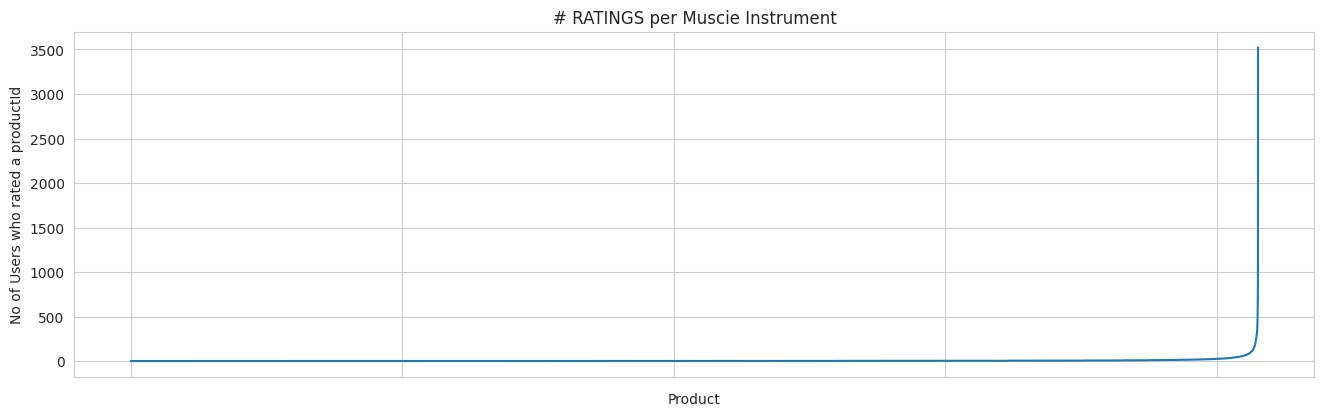

In [ ]:
no_of_ratings_per_movie = ratings.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.28))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('# RATINGS per Muscie Instrument')
plt.xlabel('Product')
plt.ylabel('No of Users who rated a productId')
ax.set_xticklabels([])

plt.show()

In [ ]:
no_of_ratings_per_movie

productId
B000ULAP4U    3523
B003VWJ2K8    2275
B003VWKPHC    1603
B001MSS6CS    1420
B00FPPQYXM    1287
              ... 
B0010E3D5O       1
B0054CNXS0       1
B0054EIRIY       1
B0054EUE9E       1
0006428320       1
Name: Rating, Length: 83046, dtype: int64

#Analysis for the Ratings

In [ ]:
#Summary statistics of rating variable
ratings['Rating'].describe().transpose()

count    500176.000000
mean          4.244350
std           1.203374
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

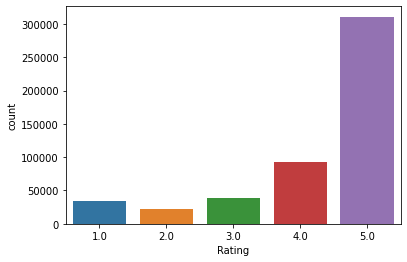

In [ ]:
# Check the distribution of the rating
sns.countplot(ratings.Rating)